# Table of Contents

#  Imports

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

#Facebook Prophet
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

# Installations

In [3]:
#!pip install prophet

# Import Data

In [2]:
#wd=pd.read_csv('https://storage.googleapis.com/weather-data-processed-for-le-wagon/cleaned_weather_hourly_darksky.csv')

df=pd.read_csv('https://storage.googleapis.com/energy_consumption_903/df_all_avg_v1.csv')

NameError: name 'pd' is not defined

In [1]:
df

NameError: name 'df' is not defined

# Exploratory Data Analysis 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588018 entries, 0 to 588017
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   DateTime     588018 non-null  object 
 1   KWH/hh       588018 non-null  float64
 2   Acorn_Group  588018 non-null  object 
dtypes: float64(1), object(2)
memory usage: 13.5+ MB


In [7]:
df['DateTime'] = pd.DatetimeIndex(df['DateTime'])

In [8]:
df.dtypes

DateTime       datetime64[ns]
KWH/hh                float64
Acorn_Group            object
dtype: object

In [9]:
df2=df.groupby(by=["Acorn_Group",df.DateTime]).mean()

In [10]:
df2

KWH/hh
Acorn_Group DateTime                     
A           2012-01-01 00:00:00  0.520000
            2012-01-01 00:30:00  0.449500
            2012-01-01 01:00:00  0.392500
            2012-01-01 01:30:00  0.451000
            2012-01-01 02:00:00  0.842000
...                                   ...
Q           2014-02-27 22:00:00  0.243118
            2014-02-27 22:30:00  0.306706
            2014-02-27 23:00:00  0.283118
            2014-02-27 23:30:00  0.195118
            2014-02-28 00:00:00  0.219294

[588018 rows x 1 columns]

In [11]:
df2.groupby(level='Acorn_Group').transform('max')

KWH/hh
Acorn_Group DateTime                     
A           2012-01-01 00:00:00  1.764750
            2012-01-01 00:30:00  1.764750
            2012-01-01 01:00:00  1.764750
            2012-01-01 01:30:00  1.764750
            2012-01-01 02:00:00  1.764750
...                                   ...
Q           2014-02-27 22:00:00  0.839455
            2014-02-27 22:30:00  0.839455
            2014-02-27 23:00:00  0.839455
            2014-02-27 23:30:00  0.839455
            2014-02-28 00:00:00  0.839455

[588018 rows x 1 columns]

In [12]:
df2.unstack(level=0)

KWH/hh                                                \
Acorn_Group                A      B         C        D         F         G   
DateTime                                                                     
2012-01-01 00:00:00  0.52000    NaN  0.237500  0.22275  0.199833  0.139333   
2012-01-01 00:30:00  0.44950    NaN  0.323500  0.29100  0.166083  0.130000   
2012-01-01 01:00:00  0.39250    NaN  0.400000  0.26100  0.150417  0.129000   
2012-01-01 01:30:00  0.45100    NaN  0.382500  0.29875  0.164250  0.118333   
2012-01-01 02:00:00  0.84200    NaN  0.227500  0.41300  0.140000  0.110000   
...                      ...    ...       ...      ...       ...       ...   
2014-02-27 22:00:00  0.78975  0.282  0.620000  0.62700  0.317231  0.174400   
2014-02-27 22:30:00  0.64575  0.261  0.592667  0.66320  0.320538  0.190800   
2014-02-27 23:00:00  0.51875  0.256  0.440667  0.45760  0.269538  0.159400   
2014-02-27 23:30:00  0.35250  0.287  0.562333  0.54040  0.210077  0.167600   
2014-02-28 00:00:00  0.19400  0.338  0.475333  0.52240  0.183308  0.124800   

                                                                            \
Acorn_Group                 H       I         J        K         L       M   
DateTime                                                                     
2012-01-01 00:00:00  0.207000     NaN  0.117667  0.09400  0.303800  0.4505   
2012-01-01 00:30:00  0.265667     NaN  0.107333  0.04550  0.329800  0.4825   
2012-01-01 01:00:00  0.239000     NaN  0.102333  0.04050  0.240400  0.4500   
2012-01-01 01:30:00  0.180000     NaN  0.108000  0.04800  0.287400  0.4145   
2012-01-01 02:00:00  0.125000     NaN  0.137000  0.05650  0.236400  0.2675   
...                       ...     ...       ...      ...       ...     ...   
2014-02-27 22:00:00  0.380200  0.1140  0.187500  0.18375  0.477500  0.3910   
2014-02-27 22:30:00  0.390900  0.1030  0.175000  0.15275  0.505625  0.3980   
2014-02-27 23:00:00  0.316300  0.0810  0.095500  0.17100  0.304750  0.3250   
2014-02-27 23:30:00  0.290800  0.0855  0.133000  0.13500  0.270625  0.0920   
2014-02-28 00:00:00  0.145400  0.0705  0.130000  0.10250  0.137375  0.0910   

                                                             
Acorn_Group                 N         O         P         Q  
DateTime                                                     
2012-01-01 00:00:00       NaN  0.088500       NaN  0.197727  
2012-01-01 00:30:00       NaN  0.076000       NaN  0.321364  
2012-01-01 01:00:00       NaN  0.061500       NaN  0.295000  
2012-01-01 01:30:00       NaN  0.046500       NaN  0.172273  
2012-01-01 02:00:00       NaN  0.051000       NaN  0.131727  
...                       ...       ...       ...       ...  
2014-02-27 22:00:00  0.219000  0.253667  0.242667  0.243118  
2014-02-27 22:30:00  0.206000  0.239000  0.219667  0.306706  
2014-02-27 23:00:00  0.192667  0.254667  0.181667  0.283118  
2014-02-27 23:30:00  0.185000  0.107000  0.172667  0.195118  
2014-02-28 00:00:00  0.130333  0.078667  0.141333  0.219294  

[37873 rows x 16 columns]

In [13]:
df3=df2.unstack(level=0).dropna()

In [14]:
df3

KWH/hh                                               \
Acorn_Group                 A      B         C         D         F       G   
DateTime                                                                     
2012-05-18 07:30:00  0.253333  0.138  0.297250  0.358571  0.207643  0.1316   
2012-05-18 08:00:00  0.183333  0.138  0.355250  0.320571  0.150143  0.1950   
2012-05-18 09:00:00  0.088000  0.138  0.177500  0.503714  0.104357  0.1766   
2012-05-18 09:30:00  0.169667  0.144  0.124250  0.596000  0.187429  0.1534   
2012-05-18 10:00:00  0.128000  0.145  0.137000  0.547857  0.185357  0.1442   
...                       ...    ...       ...       ...       ...     ...   
2014-02-27 22:00:00  0.789750  0.282  0.620000  0.627000  0.317231  0.1744   
2014-02-27 22:30:00  0.645750  0.261  0.592667  0.663200  0.320538  0.1908   
2014-02-27 23:00:00  0.518750  0.256  0.440667  0.457600  0.269538  0.1594   
2014-02-27 23:30:00  0.352500  0.287  0.562333  0.540400  0.210077  0.1676   
2014-02-28 00:00:00  0.194000  0.338  0.475333  0.522400  0.183308  0.1248   

                                                                            \
Acorn_Group                 H       I         J        K         L       M   
DateTime                                                                     
2012-05-18 07:30:00  0.194857  0.1450  0.194333  0.11450  0.262000  0.5580   
2012-05-18 08:00:00  0.231571  0.1670  0.148667  0.06850  0.265167  0.3145   
2012-05-18 09:00:00  0.160714  0.0790  0.126333  0.09200  0.284000  0.1810   
2012-05-18 09:30:00  0.147286  0.0690  0.114333  0.06700  0.140667  0.1985   
2012-05-18 10:00:00  0.202857  0.0850  0.137667  0.06650  0.175833  0.1975   
...                       ...     ...       ...      ...       ...     ...   
2014-02-27 22:00:00  0.380200  0.1140  0.187500  0.18375  0.477500  0.3910   
2014-02-27 22:30:00  0.390900  0.1030  0.175000  0.15275  0.505625  0.3980   
2014-02-27 23:00:00  0.316300  0.0810  0.095500  0.17100  0.304750  0.3250   
2014-02-27 23:30:00  0.290800  0.0855  0.133000  0.13500  0.270625  0.0920   
2014-02-28 00:00:00  0.145400  0.0705  0.130000  0.10250  0.137375  0.0910   

                                                             
Acorn_Group                 N         O         P         Q  
DateTime                                                     
2012-05-18 07:30:00  0.115333  0.099500  0.279333  0.196706  
2012-05-18 08:00:00  0.098333  0.102000  0.166000  0.175176  
2012-05-18 09:00:00  0.093333  0.063000  0.320667  0.191588  
2012-05-18 09:30:00  0.064000  0.060000  0.352667  0.147706  
2012-05-18 10:00:00  0.052667  0.070000  0.309000  0.173412  
...                       ...       ...       ...       ...  
2014-02-27 22:00:00  0.219000  0.253667  0.242667  0.243118  
2014-02-27 22:30:00  0.206000  0.239000  0.219667  0.306706  
2014-02-27 23:00:00  0.192667  0.254667  0.181667  0.283118  
2014-02-27 23:30:00  0.185000  0.107000  0.172667  0.195118  
2014-02-28 00:00:00  0.130333  0.078667  0.141333  0.219294  

[31229 rows x 16 columns]

In [15]:
df3['KWH/hh'][['A']]

Acorn_Group,A
DateTime,
2012-05-18 07:30:00,0.253333
2012-05-18 08:00:00,0.183333
2012-05-18 09:00:00,0.088000
2012-05-18 09:30:00,0.169667
2012-05-18 10:00:00,0.128000
...,...
2014-02-27 22:00:00,0.789750
2014-02-27 22:30:00,0.645750
2014-02-27 23:00:00,0.518750


Text(0, 0.5, 'Energy(kW/HH)')

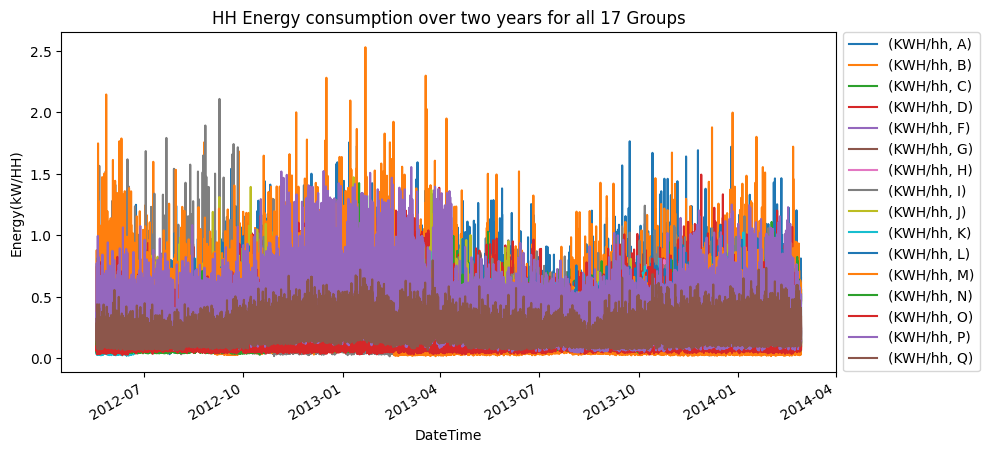

In [16]:
fig, ax = plt.subplots(figsize=(10, 5))
df3.plot(ax=ax)

plt.title('HH Energy consumption over two years for all 17 Groups', color='black')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Energy(kW/HH)")

<AxesSubplot:xlabel='DateTime'>

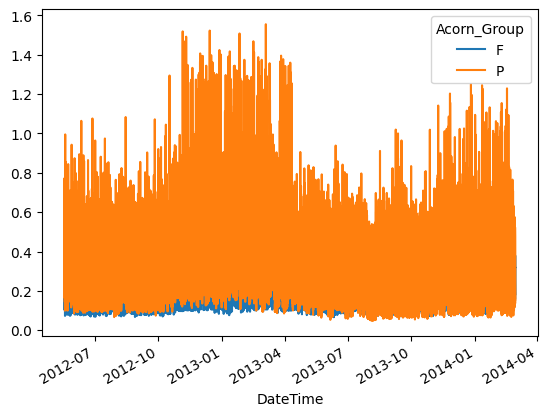

In [17]:
df3['KWH/hh'][['F','P']].plot()

In [18]:
df4=df3.copy()
df4.describe()['KWH/hh']['A']

count    31229.000000
mean         0.313937
std          0.225469
min          0.034500
25%          0.141000
50%          0.250333
75%          0.413000
max          1.764750
Name: A, dtype: float64

In [19]:
mean_groups=pd.DataFrame(df4.describe().iloc[1,:].unstack(level=0))
mean_groups=mean_groups.reset_index()
mean_groups

,Acorn_Group,KWH/hh
0,A,0.313937
1,B,0.209477
2,C,0.287388
3,D,0.333639
4,F,0.203338
5,G,0.186482
6,H,0.251232
7,I,0.162108
8,J,0.193680
9,K,0.156186


<AxesSubplot:xlabel='Acorn_Group', ylabel='KWH/hh'>

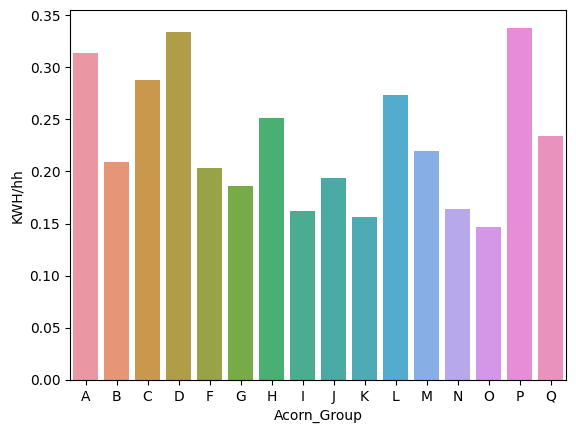

In [20]:
sns.barplot(x=mean_groups['Acorn_Group'],y=mean_groups['KWH/hh'])

In [21]:
df.index = df['DateTime']
df.drop(columns='DateTime')
dfgrouped=df.groupby(by=[df.index.day,df.index.month,'Acorn_Group']).mean()

In [22]:
dfgrouped

KWH/hh
DateTime DateTime Acorn_Group          
1        1        A            0.441330
                  B            0.282552
                  C            0.385170
                  D            0.394303
                  F            0.217371
...                                 ...
31       12       M            0.290108
                  N            0.216833
                  O            0.169580
                  P            0.314517
                  Q            0.267733

[5853 rows x 1 columns]

# Preprocessing Data

In [23]:
df

,DateTime,KWH/hh,Acorn_Group
DateTime,,,
2012-01-01 00:00:00,2012-01-01 00:00:00,0.520000,A
2012-01-01 00:30:00,2012-01-01 00:30:00,0.449500,A
2012-01-01 01:00:00,2012-01-01 01:00:00,0.392500,A
2012-01-01 01:30:00,2012-01-01 01:30:00,0.451000,A
2012-01-01 02:00:00,2012-01-01 02:00:00,0.842000,A
...,...,...,...
2014-02-27 22:00:00,2014-02-27 22:00:00,0.243118,Q
2014-02-27 22:30:00,2014-02-27 22:30:00,0.306706,Q
2014-02-27 23:00:00,2014-02-27 23:00:00,0.283118,Q


In [24]:
print(df.index.hour.unique())
print(df.index.minute.unique())

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23],
           dtype='int64', name='DateTime')
Int64Index([0, 30], dtype='int64', name='DateTime')


In [25]:
df5=df.loc[:,['Acorn_Group','KWH/hh']]

In [26]:
data_gla=df5.groupby(by=df5.index).mean()
data_gla

,KWH/hh
DateTime,
2012-01-01 00:00:00,0.231551
2012-01-01 00:30:00,0.249021
2012-01-01 01:00:00,0.230137
2012-01-01 01:30:00,0.222626
2012-01-01 02:00:00,0.228136
...,...
2014-02-27 22:00:00,0.343924
2014-02-27 22:30:00,0.335663
2014-02-27 23:00:00,0.269226


In [27]:
data_gla=data_gla.reset_index()
data_gla

,DateTime,KWH/hh
0,2012-01-01 00:00:00,0.231551
1,2012-01-01 00:30:00,0.249021
2,2012-01-01 01:00:00,0.230137
3,2012-01-01 01:30:00,0.222626
4,2012-01-01 02:00:00,0.228136
...,...,...
37868,2014-02-27 22:00:00,0.343924
37869,2014-02-27 22:30:00,0.335663
37870,2014-02-27 23:00:00,0.269226
37871,2014-02-27 23:30:00,0.236664


In [28]:
data_gla.rename(columns={"DateTime": "ds", "KWH/hh": "y"},inplace=True)
data_gla

,ds,y
0,2012-01-01 00:00:00,0.231551
1,2012-01-01 00:30:00,0.249021
2,2012-01-01 01:00:00,0.230137
3,2012-01-01 01:30:00,0.222626
4,2012-01-01 02:00:00,0.228136
...,...,...
37868,2014-02-27 22:00:00,0.343924
37869,2014-02-27 22:30:00,0.335663
37870,2014-02-27 23:00:00,0.269226
37871,2014-02-27 23:30:00,0.236664


In [42]:
## custom holidays
# playoffs = pd.DataFrame({
#   'holiday': 'playoff',
#   'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
#                         '2010-01-24', '2010-02-07', '2011-01-08',
#                         '2013-01-12', '2014-01-12', '2014-01-19',
#                         '2014-02-02', '2015-01-11', '2016-01-17',
#                         '2016-01-24', '2016-02-07'])
# })
# superbowls = pd.DataFrame({
#   'holiday': 'superbowl',
#   'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07'])
# })
# holidays = pd.concat((playoffs, superbowls))
# holidays 

In [59]:
##  UK bank holidays, took out Northern Ireland and Scotland as data is for London
holidays=pd.read_csv(os.path.join(os.getcwd(),'../raw_data/uk_bank_holidays.csv'))
holidays.rename(columns={'Type':'holiday','Bank holidays':'ds'},inplace=True)
holidays

,holiday,ds
0,Boxing Day,26/12/2012
1,Christmas Day,25/12/2012
2,Summer bank holiday,27/08/2012
3,Queen's Diamond Jubilee,06/05/2012
4,Spring bank holiday,06/04/2012
5,Early May bank holiday,05/07/2012
6,Easter Monday,04/09/2012
7,Good Friday,04/06/2012
8,New Year's Day,01/02/2012
9,Boxing Day,26/12/2013


In [65]:
holidays.loc[:,'ds']=pd.to_datetime(holidays['ds'],format="%d/%m/%Y")

# Train Model

In [66]:
m = Prophet(holidays=holidays,changepoint_prior_scale=0.01).fit(data_gla)

17:16:54 - cmdstanpy - INFO - Chain [1] start processing
17:17:07 - cmdstanpy - INFO - Chain [1] done processing


# Forecast

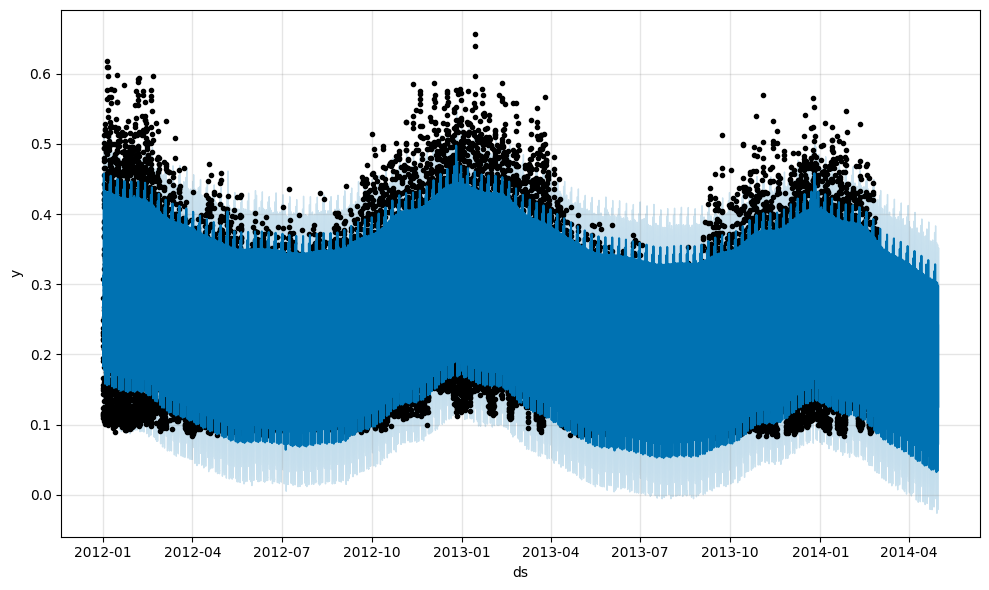

In [67]:
future = m.make_future_dataframe(periods=1488, freq='30T')
fcst = m.predict(future)
fig = m.plot(fcst)

<AxesSubplot:xlabel='ds', ylabel='yhat'>

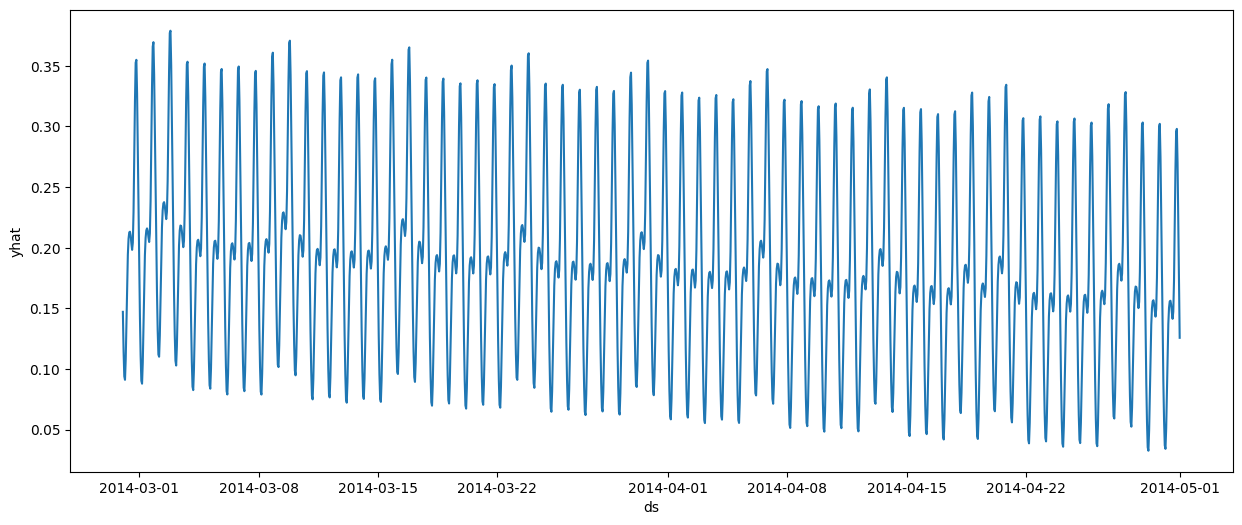

In [68]:
forecast=fcst.loc[fcst['ds']>'2014-02-28 00:00:00',['ds','yhat']]
figure(figsize=(15,6))
sns.lineplot(x=forecast['ds'],y=forecast['yhat'])

In [69]:
fcst

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Boxing Day,Boxing Day_lower,Boxing Day_upper,Christmas Day,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-01 00:00:00,0.228628,0.219762,0.329714,0.228628,0.228628,0.0,0.0,0.0,0.0,...,0.013648,0.013648,0.013648,0.059884,0.059884,0.059884,0.0,0.0,0.0,0.276525
1,2012-01-01 00:30:00,0.228629,0.205599,0.315731,0.228629,0.228629,0.0,0.0,0.0,0.0,...,0.014209,0.014209,0.014209,0.059879,0.059879,0.059879,0.0,0.0,0.0,0.256113
2,2012-01-01 01:00:00,0.228631,0.183295,0.293025,0.228631,0.228631,0.0,0.0,0.0,0.0,...,0.014758,0.014758,0.014758,0.059874,0.059874,0.059874,0.0,0.0,0.0,0.237391
3,2012-01-01 01:30:00,0.228632,0.166785,0.278521,0.228632,0.228632,0.0,0.0,0.0,0.0,...,0.015295,0.015295,0.015295,0.059868,0.059868,0.059868,0.0,0.0,0.0,0.220525
4,2012-01-01 02:00:00,0.228634,0.148877,0.263359,0.228634,0.228634,0.0,0.0,0.0,0.0,...,0.015819,0.015819,0.015819,0.059863,0.059863,0.059863,0.0,0.0,0.0,0.205930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39356,2014-04-30 20:00:00,0.182213,0.239647,0.352350,0.181445,0.182923,0.0,0.0,0.0,0.0,...,-0.007864,-0.007864,-0.007864,-0.022478,-0.022478,-0.022478,0.0,0.0,0.0,0.298028
39357,2014-04-30 21:00:00,0.182206,0.212202,0.322926,0.181437,0.182917,0.0,0.0,0.0,0.0,...,-0.007996,-0.007996,-0.007996,-0.022509,-0.022509,-0.022509,0.0,0.0,0.0,0.270228
39358,2014-04-30 22:00:00,0.182199,0.164625,0.281411,0.181429,0.182911,0.0,0.0,0.0,0.0,...,-0.008100,-0.008100,-0.008100,-0.022540,-0.022540,-0.022540,0.0,0.0,0.0,0.223708
39359,2014-04-30 23:00:00,0.182192,0.117296,0.227591,0.181420,0.182905,0.0,0.0,0.0,0.0,...,-0.008174,-0.008174,-0.008174,-0.022571,-0.022571,-0.022571,0.0,0.0,0.0,0.172625


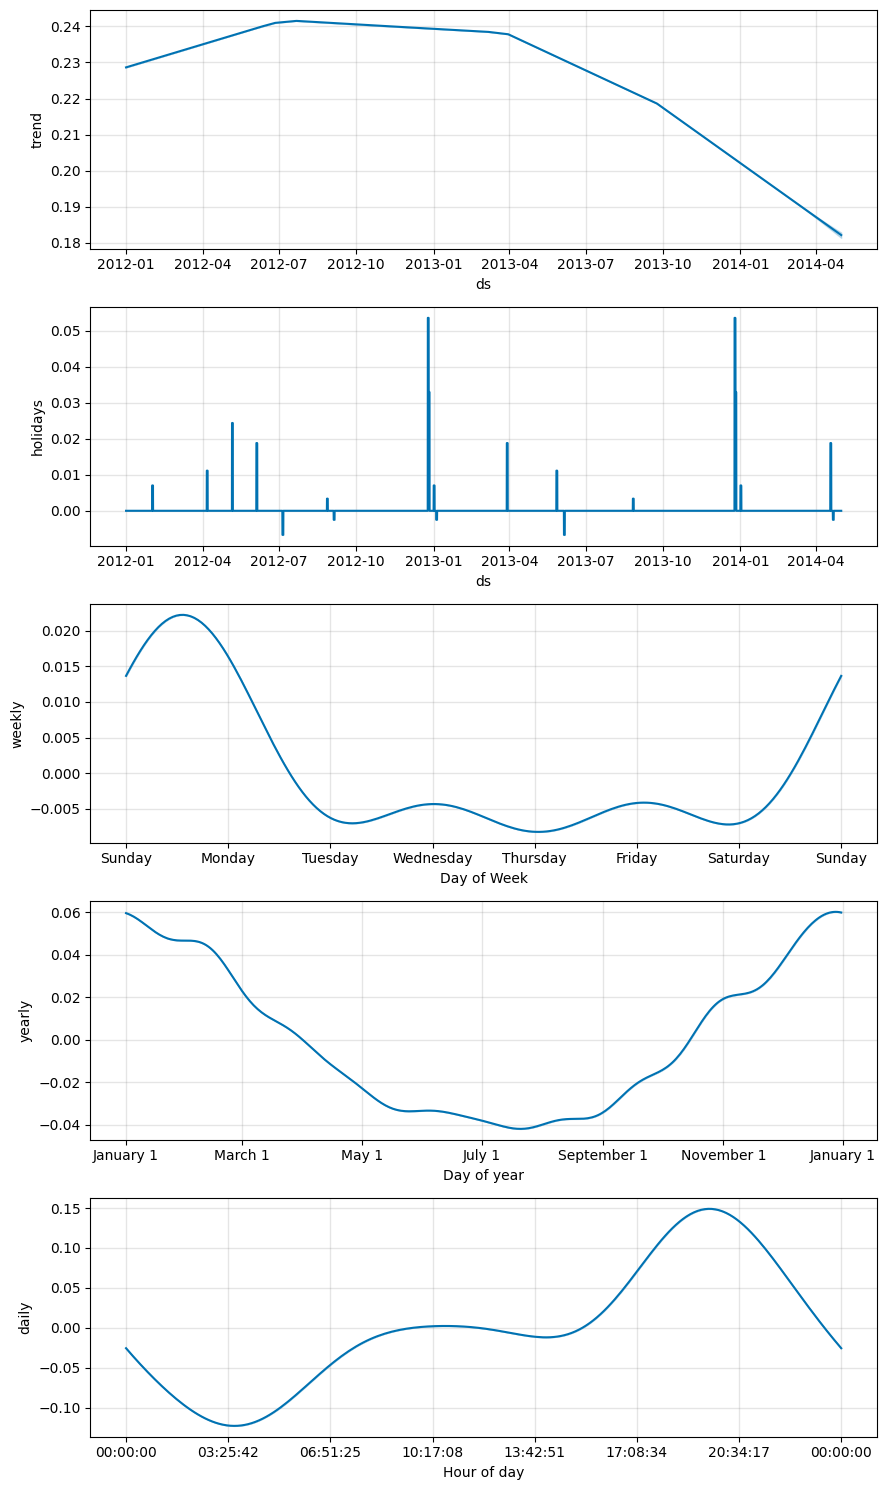

In [70]:
fig = m.plot_components(fcst)


# Cross-Validate

In [71]:

df_cv = cross_validation(m, initial='366 days', period='180 days', horizon = '90 days')


  0%|                                                                                                                                 | 0/2 [00:00<?, ?it/s]17:18:16 - cmdstanpy - INFO - Chain [1] start processing
17:18:22 - cmdstanpy - INFO - Chain [1] done processing
 50%|████████████████████████████████████████████████████████████▌                                                            | 1/2 [00:14<00:14, 14.97s/it]17:18:31 - cmdstanpy - INFO - Chain [1] start processing
17:18:37 - cmdstanpy - INFO - Chain [1] done processing
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:30<00:00, 15.02s/it]


In [72]:
df_cv


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2013-06-03 00:30:00,0.165890,0.109576,0.223049,0.151342,2013-06-03
1,2013-06-03 01:00:00,0.146416,0.084747,0.208318,0.150542,2013-06-03
2,2013-06-03 01:30:00,0.128832,0.071919,0.190249,0.121030,2013-06-03
3,2013-06-03 02:00:00,0.113400,0.057674,0.174434,0.111636,2013-06-03
4,2013-06-03 02:30:00,0.100705,0.043504,0.158801,0.114406,2013-06-03
...,...,...,...,...,...,...
8635,2014-02-27 22:00:00,0.298932,0.243011,0.356645,0.343924,2013-11-30
8636,2014-02-27 22:30:00,0.273094,0.214635,0.327244,0.335663,2013-11-30
8637,2014-02-27 23:00:00,0.247607,0.189883,0.304831,0.269226,2013-11-30
8638,2014-02-27 23:30:00,0.223407,0.167349,0.282202,0.236664,2013-11-30


# Permorfance Metrics 

In [73]:
df_p = performance_metrics(df_cv)

In [74]:
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,9 days 00:00:00,0.001466,0.038292,0.030078,0.165777,0.116905,0.153737,0.879630
1,9 days 00:30:00,0.001466,0.038292,0.030080,0.165764,0.116905,0.153739,0.879630
2,9 days 01:00:00,0.001468,0.038315,0.030130,0.166066,0.117544,0.154052,0.879630
3,9 days 01:30:00,0.001472,0.038361,0.030172,0.166368,0.117780,0.154278,0.879630
4,9 days 02:00:00,0.001477,0.038432,0.030245,0.167046,0.118382,0.154820,0.878472


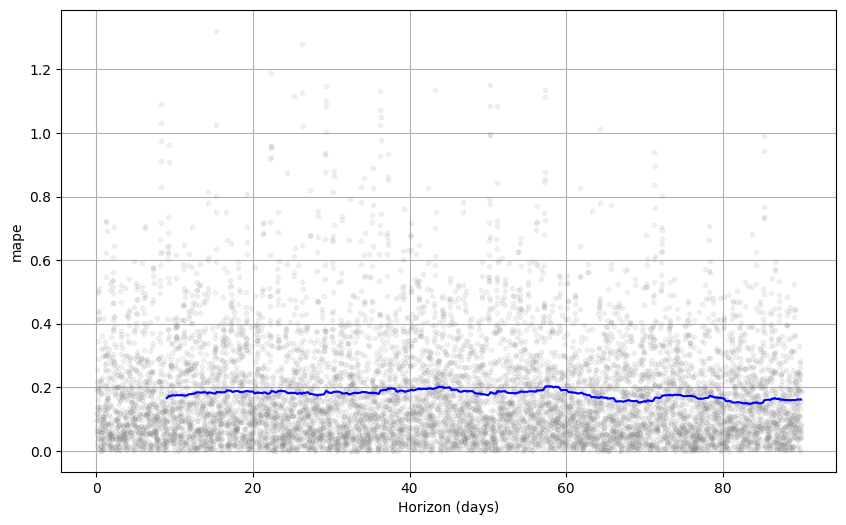

In [75]:
fig = plot_cross_validation_metric(df_cv, metric='mape')